# OASIS INFOBYTE INTERN,AUGUST -2023

Naveen S -- Data Science Intern

TASK 3

Car Price Prediction Model using Python:

OBJECTIVE: To predict car sales using Machine Learning.

The dataset I’m using here to train a car price prediction model was downloaded from Kaggle. It contains data about all the main features that contribute to the price of a car. 

So let’s start this task by importing the necessary Python libraries and the dataset:

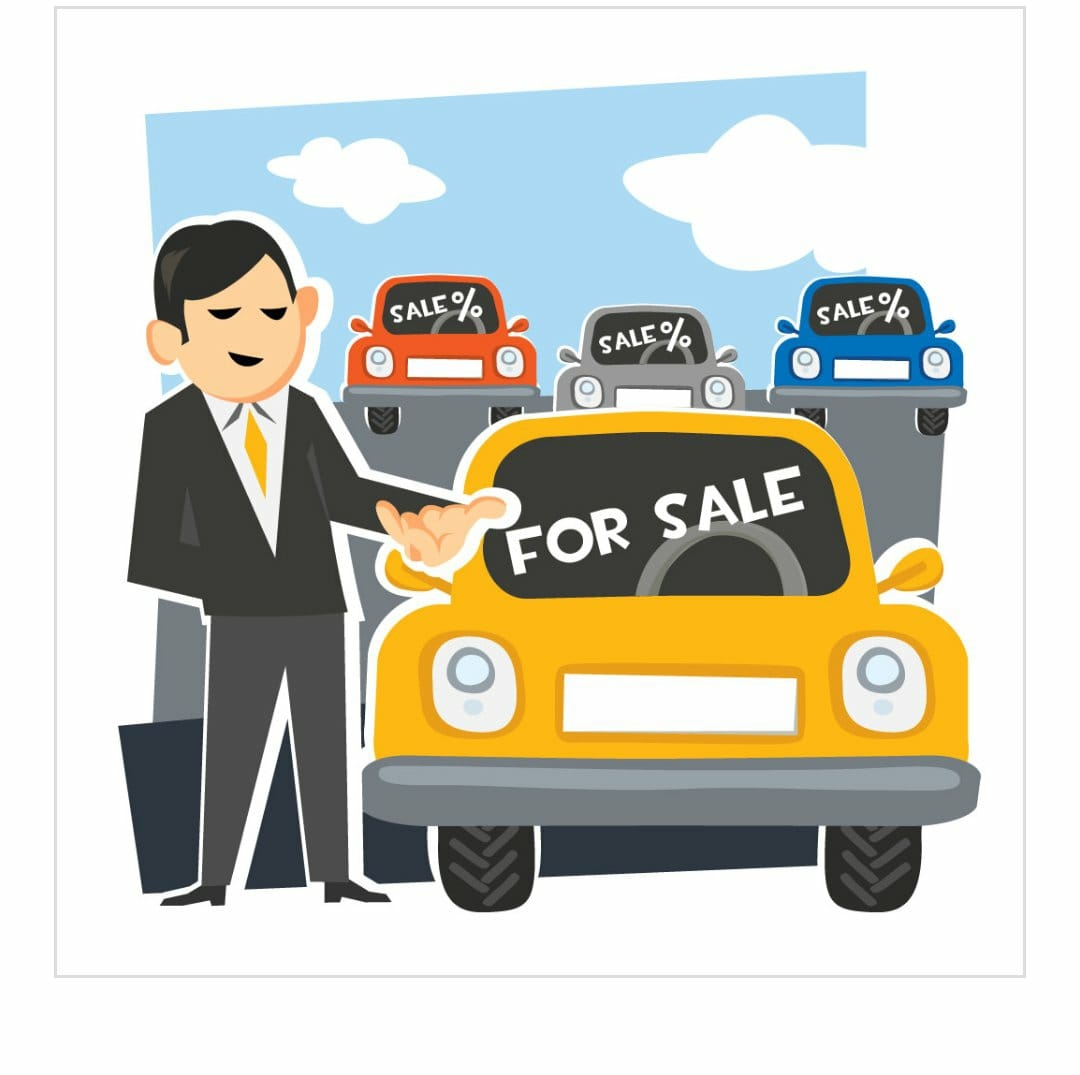

In [2]:
from IPython.display import Image
Image(filename=r"C:\Users\NAVEEN\OasisImages\car_sale.jpg",width=400,height=400)

# Importing Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# DATA COLLECTION AND PROCESSING

In [25]:
#loading the dataset
car_ds = pd.read_csv(r"C:\Users\NAVEEN\oasisdatas\CarPrice_Assignment.csv")
print("the data is loaded successfully")

the data is loaded successfully


In [26]:
car_ds.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
car_ds.shape

(205, 26)

In [28]:
car_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [29]:
car_ds.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [51]:
#checking the number of missing values
car_ds.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [52]:
# checking the distribution of categorical data
print(car_ds.fueltype.value_counts())
print(car_ds.aspiration.value_counts())
print(car_ds.doornumber.value_counts())
print(car_ds.carbody.value_counts())
print(car_ds.drivewheel.value_counts())
print(car_ds.enginelocation.value_counts())
print(car_ds.fuelsystem.value_counts())
print(car_ds.cylindernumber.value_counts())
print(car_ds.enginetype.value_counts())


0    185
1     20
Name: fueltype, dtype: int64
0    168
1     37
Name: aspiration, dtype: int64
1    205
Name: doornumber, dtype: int64
0    96
1    70
2    25
3     8
4     6
Name: carbody, dtype: int64
0    120
1     76
2      9
Name: drivewheel, dtype: int64
0    202
1      3
Name: enginelocation, dtype: int64
0    94
1    66
2    20
3    20
4     3
5     1
6     1
Name: fuelsystem, dtype: int64
0    159
1     24
2     11
3      5
4      4
5      1
6      1
Name: cylindernumber, dtype: int64
0    148
1     15
2     13
3     12
4     12
5      4
6      1
Name: enginetype, dtype: int64


In [53]:
car_ds.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,1,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,1,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,1,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [54]:
car_ds.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            1
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            7
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [55]:
car_ds.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# BOXPLOT

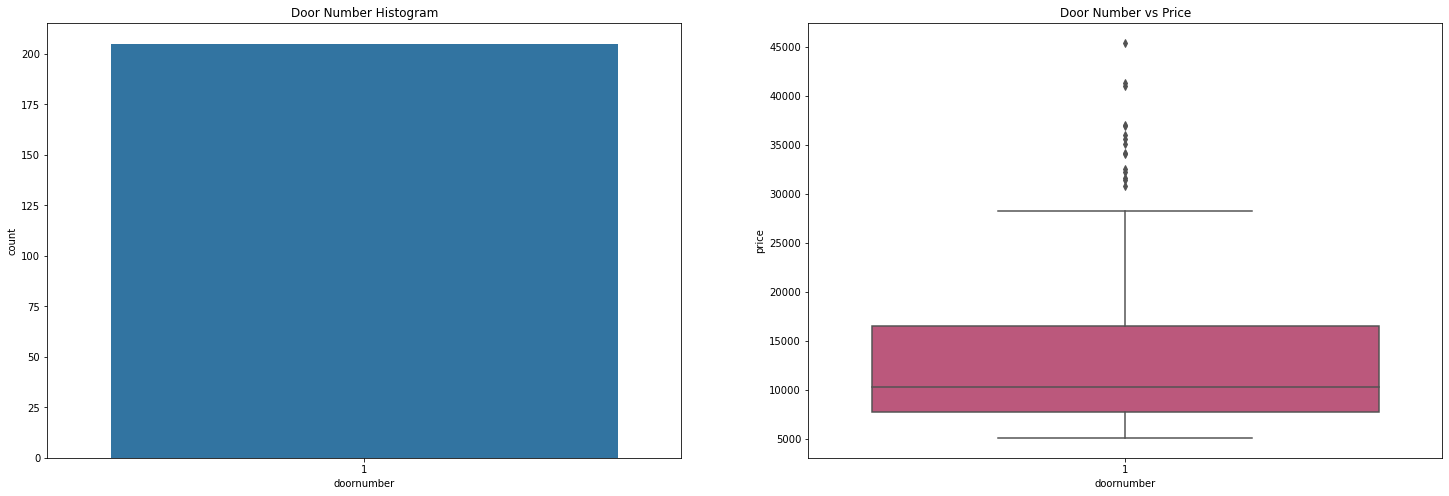

In [56]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(x=car_ds.doornumber)

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=car_ds.doornumber, y=car_ds.price, palette=("plasma"))

plt.show()

ENCODING NUMERICAL VALUE

In [61]:
#encoding "fueltype" column
car_ds.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)

#encoding "aspiration" column
car_ds.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)

#encoding "doornumber" column
car_ds.replace({'doornumber':{'four':1,'two':1}},inplace=True)

#encoding "carbody" column
car_ds.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace=True)

#encoding "drivewheel" column
car_ds.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace=True)

#encoding "enginelocation" column
car_ds.replace({'enginelocation':{'front':0,'rear':1}},inplace=True)

#encoding "fuelsystem" column
car_ds.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':3,'4bbl':4,'mfi':5,'spfi':6}},inplace=True)

#encoding"cylindernumber" column
car_ds.replace({'cylindernumber':{'four':0,'six':1,'five':2,'eight':3,'two':4,'three':5,'twelve':6}},inplace=True)

#encoding "enginetype" column
car_ds.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}},inplace=True)

car_ds

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,1,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,1,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,1,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,0,1,0,1,0,109.1,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,0,1,1,0,1,0,109.1,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,0,0,1,0,1,0,109.1,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,1,1,1,0,1,0,109.1,...,145,2,3.01,3.40,23.0,106,4800,26,27,22470.0


In [58]:
car_ds['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [62]:
car_ds['CarName'].value_counts()

toyota corolla             6
peugeot 504                6
toyota corona              6
subaru dl                  4
mitsubishi mirage g4       3
                          ..
toyota corolla tercel      1
bmw x5                     1
buick opel isuzu deluxe    1
isuzu D-Max V-Cross        1
audi 100 ls                1
Name: CarName, Length: 147, dtype: int64

# DROP THE COLUMN

In [63]:
X = car_ds.drop(['CarName','price'],axis=1)
Y = car_ds['price']
print(X)


     car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0         1          3         0           0           1        4           1   
1         2          3         0           0           1        4           1   
2         3          1         0           0           1        1           1   
3         4          2         0           0           1        0           0   
4         5          2         0           0           1        0           2   
..      ...        ...       ...         ...         ...      ...         ...   
200     201         -1         0           0           1        0           1   
201     202         -1         0           1           1        0           1   
202     203         -1         0           0           1        0           1   
203     204         -1         1           1           1        0           1   
204     205         -1         0           1           1        0           1   

     enginelocation  wheelb

# TRAINING AND SPLITTING THE DATA

In [64]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [65]:
print("X_train.shape:", X1_train.shape)
print("X_test.shape:", X1_test.shape)
print("Y_train.shape:", Y1_train.shape)
print("Y_test.shape:", Y1_test.shape)

X_train.shape: (184, 24)
X_test.shape: (21, 24)
Y_train.shape: (184,)
Y_test.shape: (21,)


In [66]:
# loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X1_train,Y1_train)

LinearRegression()

In [68]:
# prediction on Training data

training_data_prediction = lin_reg_model.predict(X1_train)
print(training_data_prediction)

[ 7134.72991775 22213.21272138 17839.79953332 10833.65109347
  5262.0913114   5917.07657204  8078.11812591 14736.78030771
 16438.75071796  9847.88603624 12925.3715246   5905.55687494
 20386.92774456  7427.31097576 18943.72338156 18638.16855218
 19143.56876659  9258.70105352  8709.96963866 16493.72050299
 33391.75406654 22786.4414931   5885.03775062  9890.44561794
  8189.04381275  6257.71125193  8376.41444742  7136.91312531
 12959.52215191 30346.37507221 10370.74064917  8113.47360935
  7028.2185274  18617.9613049  15874.83225243 17105.37801814
 21121.43457705 12117.36963737 10922.56488452  5921.52070874
  9327.30266523  7528.54045203 17982.97952107 16294.34671073
  5464.05213421 15230.7748411  23282.00152445 17634.06477559
 10615.73725554 13726.48078729  5351.32848004  6063.93557466
 13723.44641111  8440.10097214  6929.08047649  8467.75023169
 13938.98669357  6918.39014981 13559.59727467 18269.82875698
  9906.15987068  7464.85138363 12036.03055956 14935.8975411
 10163.91392568 16757.442

# R squared Error

In [69]:

error_score = metrics.r2_score(Y1_train, training_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.9027472016097514


# SCATTER-PLOT

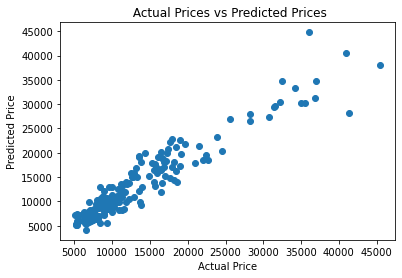

In [70]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [71]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X1_test)

In [72]:
# R squared Error
error_score = metrics.r2_score(Y1_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9395402837947571


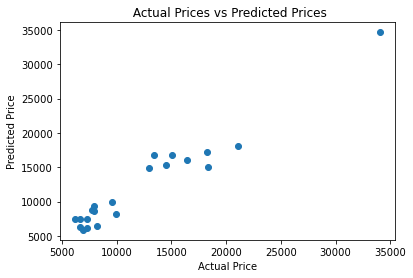

In [73]:
plt.scatter(Y1_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# LINEAR REGRESSION MODEL

In [75]:
# loading the linear regression model
lass_reg_model = Lasso()
lass_reg_model.fit(X1_train,Y1_train)

Lasso()

In [76]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X1_test)

In [77]:
# R squared Error
error_score = metrics.r2_score(Y1_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9396516777242747


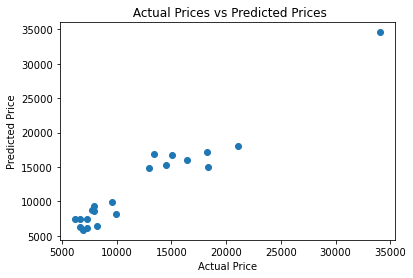

In [78]:
plt.scatter(Y1_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

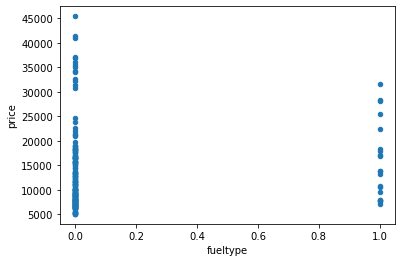

In [79]:
# Draw a scatter plot
car_ds.plot.scatter(x = 'fueltype', y = 'price');

BARPLOT

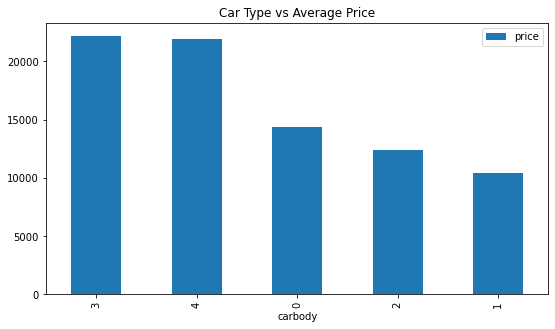

In [80]:
car_ds = pd.DataFrame(car_ds.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
car_ds.plot.bar(figsize=(9,5))
plt.title('Car Type vs Average Price')
plt.show()

# Note that : 'sedan' : 0, 'hatchback' : 1 ,'wagon' : 2, 'hardtop' : 3, 'convertible' : 4

# THANK YOU